In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from dateutil.relativedelta import relativedelta
from datetime import *

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
import os
os.getcwd()

'C:\\Users\\2180033\\Desktop\\python_begins\\WAVVE'

## 서비스 데이터 읽기 : 69,708 rows, 14 columns
  - Rephurchase 정보 포함

In [4]:
df_service = pd.read_csv('Train/train_service.csv', parse_dates=['registerdate', 'enddate'], infer_datetime_format=True)
df_service.sample(3)

,uno,registerdate,enddate,productcode,pgamount,chargetypeid,concurrentwatchcount,promo_100,coinReceived,Repurchase,devicetypeid,isauth,gender,agegroup
64825,b3399bd488b75b27bcd8da7dd93bd4978e370ed17346d8...,2021-03-11 23:44:12,2021-04-11 23:44:12,pk_1487,100.00,180,1,O,NaN,O,mobile,Y,F,25
4,445fb8813626d3d49b94b5be58cd76d80ed31fa94f8372...,2021-03-09 10:32:36,2021-04-09 10:32:36,pk_1508,9.99,140,1,NaN,NaN,O,ios,NaN,NaN,40
33676,ffe3a6c62f9100882ba3bf4a0a61dbfde6eefada592f60...,2021-03-05 18:55:59,2021-04-05 18:55:59,pk_1488,10900.00,134,2,NaN,O,O,pc,Y,F,50


In [5]:
df_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69708 entries, 0 to 69707
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   uno                   69708 non-null  object        
 1   registerdate          69708 non-null  datetime64[ns]
 2   enddate               69708 non-null  datetime64[ns]
 3   productcode           69708 non-null  object        
 4   pgamount              69708 non-null  float64       
 5   chargetypeid          69708 non-null  int64         
 6   concurrentwatchcount  69708 non-null  int64         
 7   promo_100             35729 non-null  object        
 8   coinReceived          12564 non-null  object        
 9   Repurchase            69708 non-null  object        
 10  devicetypeid          69708 non-null  object        
 11  isauth                51727 non-null  object        
 12  gender                58228 non-null  object        
 13  agegroup        

## 서비스 데이터 Unique Value

In [6]:
# Column 별 unique values
for column in df_service.columns.values.tolist():
    unique_value_list = df_service[column].unique()
    print(f'Column <{column}>', len(unique_value_list))
    print(unique_value_list[:10], '\n')

Column <uno> 69145
['b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3d75c03d99136f8e0d07bb55627eac3e9a288c20c74cee8641bbdff95108d737b7df108f281d6bbba29'
 '4ec765db76545c1d6dda9f421590bf9d02f584009f8d92100afeef4594ee72306b661c43d19086f82f85f02bbb5716280f52bb7f0fde823a0656a830a0e6e41f'
 '304cacae950e53952afebff0b212f5bfef6a5a0abb4c450879e853055b88063bfc32ee48bea746e952c79f1e1d619db50570991d74d5e19afeb32c5ce1b630dc'
 '4f86d917c53cb6bd8949f76dba7260311e8c1748748a028efd353137a1d459f7c12f6c2af10aec81da39c3bfe8a2d913fd24c26403b0aecba90b11ed2611ad5c'
 '445fb8813626d3d49b94b5be58cd76d80ed31fa94f8372618142c34471e001896e2d3b02a04ad6e2ceb35d91f0305d51eac4ed30a6925db9fcf37d2b8521a2cf'
 'd87ce5040893986019ea58ba1d1df033b8bc6dc03c11634b7bd47c36a5f5c8623993a63f306321dd0f3b69284b006a2643bc4e7ae55d71131389fc176b3db39b'
 '01b16f9f7ff29b48b1ee0d1a89d1eb9662474e5eedb8c2d967ea43793d3f9d03a560771374901302484d7598e771f39abbd8766c54f38753186b3f17eee9fb48'
 '6722de45f1c29af6057973492fed22c05e63a7bc90203d5120b82dc

## 서비스 데이터 결측치 및 이상치 처리

In [7]:
filled_service = df_service

In [8]:
service_missing_info = pd.DataFrame(filled_service.isnull().sum().sort_values(ascending=False), columns=['missing num'])
service_missing_info['%'] = service_missing_info['missing num']/filled_service.shape[0]*100
service_missing_info

,missing num,%
coinReceived,57144,81.976244
promo_100,33979,48.744764
isauth,17981,25.794744
gender,11480,16.468698
agegroup,0,0.000000
devicetypeid,0,0.000000
Repurchase,0,0.000000
concurrentwatchcount,0,0.000000
chargetypeid,0,0.000000
pgamount,0,0.000000


In [9]:
# gender null --> N
filled_service['gender'] = filled_service['gender'].fillna('N')
filled_service['gender'].value_counts()

F    36591
M    21637
N    11480
Name: gender, dtype: int64

In [10]:
# agegroup outlier (0살, 950살) --> mean
filled_service['agegroup'].value_counts().sort_index()

0        608
5          2
10         1
15      1227
20      9562
25     12099
30     10435
35      6905
40     19281
45      3739
50      2725
55      1385
60       885
65       414
70       209
75       129
80        70
85        20
90         9
95         1
120        1
950        1
Name: agegroup, dtype: int64

In [11]:
filled_service.shape

(69708, 14)

In [12]:
age_mean = filled_service.loc[(filled_service['agegroup']<950) & (filled_service['agegroup']>0), 'agegroup'].mean()
age_mean

33.74035803701935

In [13]:
filled_service['agegroup'] = filled_service['agegroup'].replace(950, 30)
filled_service['agegroup'] = filled_service['agegroup'].replace(0, 30)
filled_service['agegroup'].value_counts().sort_index()

5          2
10         1
15      1227
20      9562
25     12099
30     11044
35      6905
40     19281
45      3739
50      2725
55      1385
60       885
65       414
70       209
75       129
80        70
85        20
90         9
95         1
120        1
Name: agegroup, dtype: int64

In [14]:
# pgamount US Dollar --> 원화
filled_service['pgamount'].value_counts().sort_index()

7.69            3
9.89           17
9.99         8313
10.99         266
13.19          12
13.49        2192
14.29          64
16.49         861
17.59           7
18.69           5
19.79           2
20.49           4
20.89           3
21.99           8
24.19           3
26.39           1
27.49           3
29.69           2
32.99           1
100.00      35729
2900.00         2
3350.00        16
3950.00       487
4900.00         9
5450.00       134
5700.00         2
5900.00        38
6210.00        19
6700.00       262
6900.00        99
6950.00       168
7900.00     12679
8100.00         1
8900.00         4
9000.00         9
9200.00         2
9810.00         1
9900.00         5
10300.00        3
10400.00        1
10900.00     5789
11550.00        1
11610.00        1
11800.00        2
12900.00        2
13750.00      119
13900.00     2350
14200.00        1
16400.00        2
16900.00        4
Name: pgamount, dtype: int64

In [15]:
filled_service.loc[(filled_service['pgamount'] < 100), 'pgamount'] = filled_service['pgamount'] * 1120
filled_service['pgamount'].value_counts().sort_index()

100.0      35729
2900.0         2
3350.0        16
3950.0       487
4900.0         9
5450.0       134
5700.0         2
5900.0        38
6210.0        19
6700.0       262
6900.0        99
6950.0       168
7900.0     12679
8100.0         1
8612.8         3
8900.0         4
9000.0         9
9200.0         2
9810.0         1
9900.0         5
10300.0        3
10400.0        1
10900.0     5789
11076.8       17
11188.8     8313
11550.0        1
11610.0        1
11800.0        2
12308.8      266
12900.0        2
13750.0      119
13900.0     2350
14200.0        1
14772.8       12
15108.8     2192
16004.8       64
16400.0        2
16900.0        4
18468.8      861
19700.8        7
20932.8        5
22164.8        2
22948.8        4
23396.8        3
24628.8        8
27092.8        3
29556.8        1
30788.8        3
33252.8        2
36948.8        1
Name: pgamount, dtype: int64

In [16]:
# 나머지 결측치는 X로 처리 (O or null인 경우)
filled_service.isnull().sum()

uno                         0
registerdate                0
enddate                     0
productcode                 0
pgamount                    0
chargetypeid                0
concurrentwatchcount        0
promo_100               33979
coinReceived            57144
Repurchase                  0
devicetypeid                0
isauth                  17981
gender                      0
agegroup                    0
dtype: int64

In [17]:
filled_service = filled_service.fillna('X')
filled_service.isnull().sum()

uno                     0
registerdate            0
enddate                 0
productcode             0
pgamount                0
chargetypeid            0
concurrentwatchcount    0
promo_100               0
coinReceived            0
Repurchase              0
devicetypeid            0
isauth                  0
gender                  0
agegroup                0
dtype: int64

In [18]:
os.getcwd()

'C:\\Users\\2180033\\Desktop\\python_begins\\WAVVE'

In [19]:
filled_service.head(5)

,uno,registerdate,enddate,productcode,pgamount,chargetypeid,concurrentwatchcount,promo_100,coinReceived,Repurchase,devicetypeid,isauth,gender,agegroup
0,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,2021-03-09 16:31:15,2021-04-09 16:31:15,pk_1487,7900.0,134,1,X,X,X,android,Y,F,45
1,4ec765db76545c1d6dda9f421590bf9d02f584009f8d92...,2021-03-09 14:33:07,2021-04-09 14:33:07,pk_1487,100.0,190,1,O,O,X,pc,Y,F,25
2,304cacae950e53952afebff0b212f5bfef6a5a0abb4c45...,2021-03-09 12:00:01,2021-04-09 12:00:01,pk_2026,10900.0,151,2,X,O,O,android,Y,F,35
3,4f86d917c53cb6bd8949f76dba7260311e8c1748748a02...,2021-03-09 22:23:12,2021-04-09 22:23:12,pk_1487,100.0,132,1,O,X,X,android,X,F,55
4,445fb8813626d3d49b94b5be58cd76d80ed31fa94f8372...,2021-03-09 10:32:36,2021-04-09 10:32:36,pk_1508,11188.8,140,1,X,X,O,ios,X,N,40


## numeric으로 전환

In [20]:
numeric_service = filled_service.copy()
numeric_service['Repurchase'].replace('O', 0, inplace=True)
numeric_service['Repurchase'].replace('X', 1, inplace=True)
numeric_service.rename(columns={'Repurchase':"Unsubscription"}, inplace=True)
numeric_service.head(5)

,uno,registerdate,enddate,productcode,pgamount,chargetypeid,concurrentwatchcount,promo_100,coinReceived,Unsubscription,devicetypeid,isauth,gender,agegroup
0,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,2021-03-09 16:31:15,2021-04-09 16:31:15,pk_1487,7900.0,134,1,X,X,1,android,Y,F,45
1,4ec765db76545c1d6dda9f421590bf9d02f584009f8d92...,2021-03-09 14:33:07,2021-04-09 14:33:07,pk_1487,100.0,190,1,O,O,1,pc,Y,F,25
2,304cacae950e53952afebff0b212f5bfef6a5a0abb4c45...,2021-03-09 12:00:01,2021-04-09 12:00:01,pk_2026,10900.0,151,2,X,O,0,android,Y,F,35
3,4f86d917c53cb6bd8949f76dba7260311e8c1748748a02...,2021-03-09 22:23:12,2021-04-09 22:23:12,pk_1487,100.0,132,1,O,X,1,android,X,F,55
4,445fb8813626d3d49b94b5be58cd76d80ed31fa94f8372...,2021-03-09 10:32:36,2021-04-09 10:32:36,pk_1508,11188.8,140,1,X,X,0,ios,X,N,40


In [21]:
numeric_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69708 entries, 0 to 69707
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   uno                   69708 non-null  object        
 1   registerdate          69708 non-null  datetime64[ns]
 2   enddate               69708 non-null  datetime64[ns]
 3   productcode           69708 non-null  object        
 4   pgamount              69708 non-null  float64       
 5   chargetypeid          69708 non-null  int64         
 6   concurrentwatchcount  69708 non-null  int64         
 7   promo_100             69708 non-null  object        
 8   coinReceived          69708 non-null  object        
 9   Unsubscription        69708 non-null  int64         
 10  devicetypeid          69708 non-null  object        
 11  isauth                69708 non-null  object        
 12  gender                69708 non-null  object        
 13  agegroup        

In [22]:
column_list = numeric_service.columns.values.tolist()
column_list.remove('uno')
column_list.remove('productcode')

for col in column_list:
    if numeric_service[col].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(numeric_service[col].values))
        numeric_service[col] = lbl.transform(numeric_service[col].values)
        
numeric_service.sample(5)

,uno,registerdate,enddate,productcode,pgamount,chargetypeid,concurrentwatchcount,promo_100,coinReceived,Unsubscription,devicetypeid,isauth,gender,agegroup
55168,c7dadd061b1a0db9df4dff8136309cc0826a225a9ea446...,2021-03-02 20:33:44,2021-04-02 20:33:44,pk_1487,100.0,131,1,0,1,0,0,1,1,50
49510,75c6f1fbbaeea6c5780c386298d6ca9d628886f849b487...,2021-03-09 06:53:40,2021-04-09 06:53:40,pk_1487,7900.0,134,1,1,1,0,0,1,0,25
9375,6f3c70a6f8c7d93fec4b3195d0ecf24b4962689b791508...,2021-03-12 00:23:31,2021-04-12 00:23:31,pk_1487,100.0,131,1,0,1,0,0,1,0,60
11441,f5301cf0db16283e26bbf89f2a41d7ed88041146a0ccef...,2021-03-01 07:35:16,2021-04-01 07:35:16,pk_1487,7900.0,134,1,1,0,0,0,1,0,40
22255,05e9fda9a6464d9ef16f9c4c7f9e3d06bdbf23ac58fbb4...,2021-03-06 17:52:03,2021-04-06 17:52:03,pk_1487,7900.0,131,1,1,1,0,0,1,1,30


In [23]:
numeric_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69708 entries, 0 to 69707
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   uno                   69708 non-null  object        
 1   registerdate          69708 non-null  datetime64[ns]
 2   enddate               69708 non-null  datetime64[ns]
 3   productcode           69708 non-null  object        
 4   pgamount              69708 non-null  float64       
 5   chargetypeid          69708 non-null  int64         
 6   concurrentwatchcount  69708 non-null  int64         
 7   promo_100             69708 non-null  int32         
 8   coinReceived          69708 non-null  int32         
 9   Unsubscription        69708 non-null  int64         
 10  devicetypeid          69708 non-null  int32         
 11  isauth                69708 non-null  int32         
 12  gender                69708 non-null  int32         
 13  agegroup        

## numeric_service 저장

In [24]:
# numeric_service.to_csv(path_or_buf="Train/numeric_service.csv", index=False)

## numeric_service 불러오기

In [25]:
# numeric_service = pd.read_csv("Train/numeric_service.csv")

In [26]:
# numeric_service

In [27]:
# numeric_service.columns

In [28]:
numeric_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69708 entries, 0 to 69707
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   uno                   69708 non-null  object        
 1   registerdate          69708 non-null  datetime64[ns]
 2   enddate               69708 non-null  datetime64[ns]
 3   productcode           69708 non-null  object        
 4   pgamount              69708 non-null  float64       
 5   chargetypeid          69708 non-null  int64         
 6   concurrentwatchcount  69708 non-null  int64         
 7   promo_100             69708 non-null  int32         
 8   coinReceived          69708 non-null  int32         
 9   Unsubscription        69708 non-null  int64         
 10  devicetypeid          69708 non-null  int32         
 11  isauth                69708 non-null  int32         
 12  gender                69708 non-null  int32         
 13  agegroup        

## 시청 이력 데이터 읽기 : 7,987,609 rows

In [29]:
df_bookmark = pd.read_csv("Train/train_bookmark.csv", parse_dates=['dates'], infer_datetime_format=True)


In [30]:
ex_uno = df_bookmark.loc[0, 'uno']
df_bookmark[df_bookmark['uno']==ex_uno]

,uno,dates,hour,channeltype,programid,title,contentid,contentnumber,section,viewtime,devicetype
0,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,2021-03-20,17,V,S01_P453505934,펜트하우스 2,S01_E454434900.1,9,1,1650,4
1,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,2021-03-13,15,V,M_T60403G,밥이 되어라,M_EP202103053628.1,42,1,1670,4
2,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,2021-03-13,6,V,S01_P453505934,펜트하우스 2,S01_E454336041.1,7,1,1800,4
3,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,2021-03-16,19,V,K02_T2020-0370,오! 삼광빌라!,K02_PS-2021033047-01-000.1,50,1,2080,4
4,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,2021-03-18,7,V,M_T60403G,밥이 되어라,M_EP202103123716.1,43,1,1680,4
5,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,2021-03-12,6,V,S01_P453505934,펜트하우스 2,S01_E454130151.1,4,1,10,4
6,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,2021-03-14,10,V,K02_T2020-0370,오! 삼광빌라!,K02_PS-2021033047-01-000.1,50,1,1290,4
7,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,2021-03-28,7,V,S01_P453505934,펜트하우스 2,S01_E454542949.1,12,1,480,4
8,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,2021-03-13,9,V,S01_P453505934,펜트하우스 2,S01_E454229316.1,5,1,40,4
9,b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3...,2021-03-12,5,V,S01_P453505934,펜트하우스 2,S01_E454229327.1,6,1,1720,4


In [31]:
df_bookmark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824112 entries, 0 to 7824111
Data columns (total 11 columns):
 #   Column         Dtype         
---  ------         -----         
 0   uno            object        
 1   dates          datetime64[ns]
 2   hour           int64         
 3   channeltype    object        
 4   programid      object        
 5   title          object        
 6   contentid      object        
 7   contentnumber  object        
 8   section        object        
 9   viewtime       int64         
 10  devicetype     int64         
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 656.6+ MB


## 시청 이력 데이터 Unique Value

In [32]:
for column in df_bookmark.columns.values.tolist():
    unique_value_list = df_bookmark[column].unique()
    print(f'Column <{column}>', len(unique_value_list))
    print(unique_value_list[:10], '\n')

Column <uno> 67306
['b3d6846338d0e98b7e0fcf735c49271ff59df86bfd78f3d75c03d99136f8e0d07bb55627eac3e9a288c20c74cee8641bbdff95108d737b7df108f281d6bbba29'
 '4ec765db76545c1d6dda9f421590bf9d02f584009f8d92100afeef4594ee72306b661c43d19086f82f85f02bbb5716280f52bb7f0fde823a0656a830a0e6e41f'
 '304cacae950e53952afebff0b212f5bfef6a5a0abb4c450879e853055b88063bfc32ee48bea746e952c79f1e1d619db50570991d74d5e19afeb32c5ce1b630dc'
 '4f86d917c53cb6bd8949f76dba7260311e8c1748748a028efd353137a1d459f7c12f6c2af10aec81da39c3bfe8a2d913fd24c26403b0aecba90b11ed2611ad5c'
 '445fb8813626d3d49b94b5be58cd76d80ed31fa94f8372618142c34471e001896e2d3b02a04ad6e2ceb35d91f0305d51eac4ed30a6925db9fcf37d2b8521a2cf'
 'd87ce5040893986019ea58ba1d1df033b8bc6dc03c11634b7bd47c36a5f5c8623993a63f306321dd0f3b69284b006a2643bc4e7ae55d71131389fc176b3db39b'
 '01b16f9f7ff29b48b1ee0d1a89d1eb9662474e5eedb8c2d967ea43793d3f9d03a560771374901302484d7598e771f39abbd8766c54f38753186b3f17eee9fb48'
 '6722de45f1c29af6057973492fed22c05e63a7bc90203d5120b82dc

## 시청 이력 데이터 가공

In [33]:
# (1) 고객별 서비스 가입 이력 수
df_feature_1 = numeric_service.groupby(by='uno', as_index=False).registerdate.count()
df_feature_1.rename(columns={'registerdate':'REG_CNT'}, inplace=True)

# (2) 고객별 서비스 가입 이력 상품 수
df_feature_2 = numeric_service[['uno','productcode']]
df_feature_2 = numeric_service.drop_duplicates() # 고객별 동일 상품 제거
df_feature_2 = numeric_service.groupby(by='uno', as_index=False).productcode.count()
df_feature_2.rename(columns={'productcode':'PRD_CNT'}, inplace=True)

# (3) 고객별 시청 건수 (1시간 단위)
df_feature_3 = df_bookmark.groupby(by='uno', as_index=False).dates.count()
df_feature_3.rename(columns={'dates':'BM_CNT'}, inplace=True)

# (4) 고객별 시청 총 시간
df_feature_4 = df_bookmark.groupby(by='uno', as_index=False).viewtime.sum()
df_feature_4.rename(columns={'viewtime':'VT_TOT'}, inplace=True)

# (5) 고객별 시청 평균 시간
df_feature_5 = df_bookmark.groupby(by='uno', as_index=False).viewtime.mean()
df_feature_5.rename(columns={'viewtime':'VT_AVG'}, inplace=True)

# (6) 고객별 시청 채널 수
df_feature_6 = df_bookmark[['uno','channeltype']]
df_feature_6 = df_feature_6.drop_duplicates() # 고객별 동일 채널 제거
df_feature_6 = df_feature_6.groupby(by='uno', as_index=False).channeltype.count()
df_feature_6.rename(columns={'channeltype':'CH_CNT'}, inplace=True)

# (7) 고객별 시청 프로그램 수
df_feature_7 = df_bookmark[['uno','programid']]
df_feature_7 = df_feature_7.drop_duplicates() # 고객별 동일 프로그램 제거
df_feature_7 = df_feature_7.groupby(by='uno', as_index=False).programid.count()
df_feature_7.rename(columns={'programid':'PRG_CNT'}, inplace=True)

# (8) 고객별 시청 디바이스 수
df_feature_8 = df_bookmark[['uno','devicetype']]
df_feature_8 = df_feature_8.drop_duplicates() # 고객별 동일 프로그램 제거
df_feature_8 = df_feature_8.groupby(by='uno', as_index=False).devicetype.count()
df_feature_8.rename(columns={'devicetype':'DEV_CNT'}, inplace=True)

In [34]:
# (9) enddate - registerdate
df_feature_9 = numeric_service[['uno', 'enddate', 'registerdate', 'Unsubscription']]
df_feature_9['REG_END'] = df_feature_9['enddate'] - df_feature_9['registerdate']
df_feature_9 = df_feature_9[['uno', 'registerdate', 'REG_END']]
df_feature_9['REG_END'] = df_feature_9['REG_END'].astype('str')
df_feature_9['REG_END'] = df_feature_9.REG_END.str.split(' days').str[0]
df_feature_9['REG_END'] = df_feature_9['REG_END'].astype('int')

<ipython-input-34-737c52ea260e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feature_9['REG_END'] = df_feature_9['enddate'] - df_feature_9['registerdate']


In [202]:
# (10) enddate - lastview

end_enddate = numeric_service.groupby(by='uno', as_index=False).enddate.max()
lastview = df_bookmark.groupby(by='uno', as_index=False).dates.max()

lastview_enddate = pd.merge(end_enddate, lastview, how='left')
lastview_enddate.rename(columns={'dates':'last_view'}, inplace=True)
lastview_enddate['LAST_V'] = lastview_enddate['enddate'] - lastview_enddate['last_view']
lastview_enddate['LAST_V'] = lastview_enddate['LAST_V'].dt.days

lastview_enddate['LAST_V'] = lastview_enddate['LAST_V'].fillna(int(40))

df_feature_10 = lastview_enddate[['uno', 'LAST_V']]

In [ ]:
df_feature_10.loc[pd_feature_10['LAST_V']<20, 'LAST_V'] = 0
df_feature_10.loc[pd_feature_10['LAST_V']>=20, 'LAST_V'] = 1
df_feature_10['LAST_V'].value_counts()

In [205]:
service_bookmark = numeric_service.copy()
feature_list = [df_feature_1, df_feature_2, df_feature_3, df_feature_4, 
                df_feature_5, df_feature_6, df_feature_7, df_feature_8, df_feature_10]

for feature in feature_list:
    service_bookmark = pd.merge(service_bookmark, feature, on="uno", how='left')
    
service_bookmark = pd.merge(service_bookmark, df_feature_9, on=["uno", 'registerdate'], how='left')
    
print(service_bookmark.columns)
print(len(service_bookmark))
print(len(numeric_service))

Index(['uno', 'registerdate', 'enddate', 'productcode', 'pgamount',
       'chargetypeid', 'concurrentwatchcount', 'promo_100', 'coinReceived',
       'Unsubscription', 'devicetypeid', 'isauth', 'gender', 'agegroup',
       'REG_CNT', 'PRD_CNT', 'BM_CNT', 'VT_TOT', 'VT_AVG', 'CH_CNT', 'PRG_CNT',
       'DEV_CNT', 'LAST_V', 'REG_END'],
      dtype='object')
69708
69708


In [206]:
service_bookmark.isna().sum()

uno                        0
registerdate               0
enddate                    0
productcode                0
pgamount                   0
chargetypeid               0
concurrentwatchcount       0
promo_100                  0
coinReceived               0
Unsubscription             0
devicetypeid               0
isauth                     0
gender                     0
agegroup                   0
REG_CNT                    0
PRD_CNT                    0
BM_CNT                  1849
VT_TOT                  1849
VT_AVG                  1849
CH_CNT                  1849
PRG_CNT                 1849
DEV_CNT                 1849
LAST_V                     0
REG_END                    0
dtype: int64

In [207]:
service_bookmark['BM_CNT'] = service_bookmark['BM_CNT'].fillna(0)
service_bookmark['VT_TOT'] = service_bookmark['VT_TOT'].fillna(0)
service_bookmark['VT_AVG'] = service_bookmark['VT_AVG'].fillna(0)
service_bookmark['CH_CNT'] = service_bookmark['CH_CNT'].fillna(0)
service_bookmark['PRG_CNT'] = service_bookmark['PRG_CNT'].fillna(0)
service_bookmark['DEV_CNT'] = service_bookmark['DEV_CNT'].fillna(0)

In [208]:
service_bookmark.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69708 entries, 0 to 69707
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   uno                   69708 non-null  object        
 1   registerdate          69708 non-null  datetime64[ns]
 2   enddate               69708 non-null  datetime64[ns]
 3   productcode           69708 non-null  object        
 4   pgamount              69708 non-null  float64       
 5   chargetypeid          69708 non-null  int64         
 6   concurrentwatchcount  69708 non-null  int64         
 7   promo_100             69708 non-null  int32         
 8   coinReceived          69708 non-null  int32         
 9   Unsubscription        69708 non-null  int64         
 10  devicetypeid          69708 non-null  int32         
 11  isauth                69708 non-null  int32         
 12  gender                69708 non-null  int32         
 13  agegroup        

## Correlation

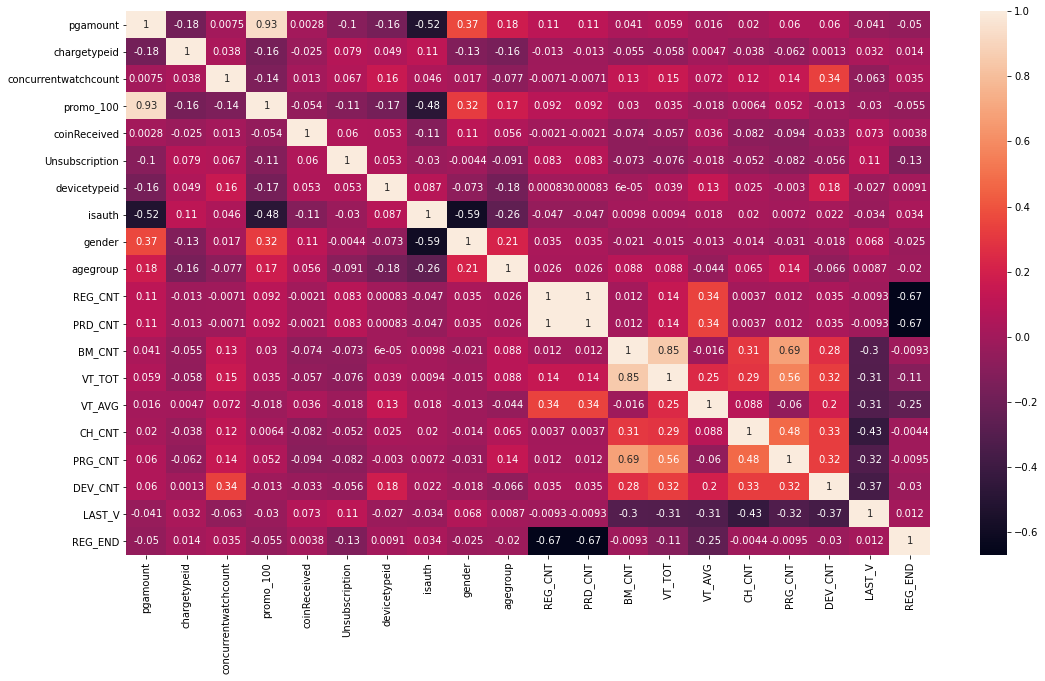

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.figure(figsize=(18,10))
sns.heatmap(service_bookmark.corr(), annot=True)   

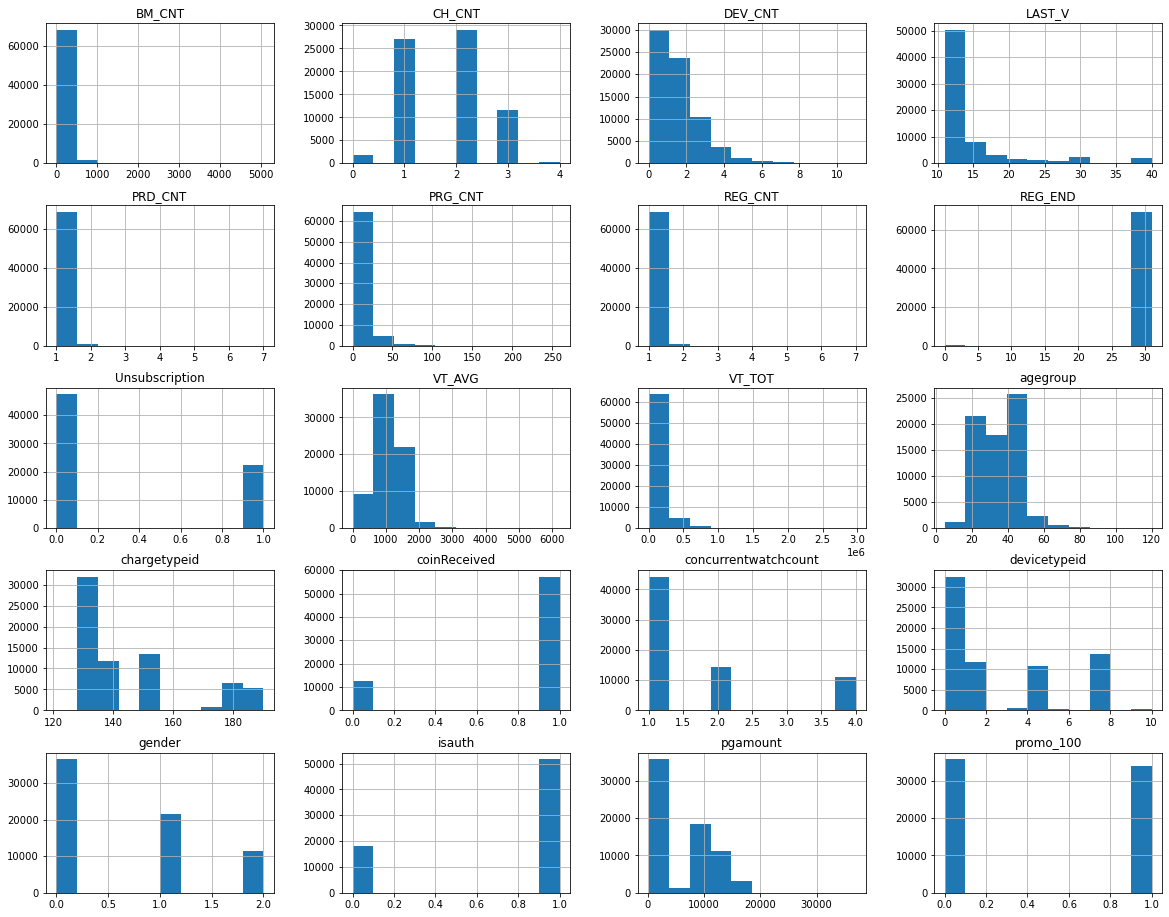

In [210]:
service_bookmark.hist(figsize=(20,16))
plt.show()

## predict service data 가공

In [211]:
predict_service = pd.read_csv("Predict/predict_service.csv", parse_dates=['registerdate','enddate'], infer_datetime_format=True)
predict_bookmark = pd.read_csv("Predict/predict_bookmark.csv", parse_dates=['dates'], infer_datetime_format=True)

df_predict_service = predict_service.copy()
df_predict_bookmark = predict_bookmark.copy()

In [212]:
df_predict_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   uno                   19001 non-null  object        
 1   registerdate          19001 non-null  datetime64[ns]
 2   enddate               19001 non-null  datetime64[ns]
 3   productcode           19001 non-null  object        
 4   pgamount              19001 non-null  float64       
 5   chargetypeid          19001 non-null  int64         
 6   concurrentwatchcount  19001 non-null  int64         
 7   promo_100             10019 non-null  object        
 8   coinReceived          3220 non-null   object        
 9   Repurchase            248 non-null    object        
 10  devicetypeid          19001 non-null  object        
 11  isauth                14219 non-null  object        
 12  gender                16056 non-null  object        
 13  agegroup        

In [213]:
df_predict_bookmark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973560 entries, 0 to 1973559
Data columns (total 11 columns):
 #   Column         Dtype         
---  ------         -----         
 0   uno            object        
 1   dates          datetime64[ns]
 2   hour           int64         
 3   channeltype    object        
 4   programid      object        
 5   title          object        
 6   contentid      object        
 7   contentnumber  object        
 8   section        object        
 9   viewtime       int64         
 10  devicetype     int64         
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 165.6+ MB


In [214]:
predict_missing_info = pd.DataFrame(predict_service.isnull().sum().sort_values(ascending=False), columns=['missing num'])
predict_missing_info['%'] = predict_missing_info['missing num']/predict_service.shape[0]*100
predict_missing_info

,missing num,%
Repurchase,18753,98.694806
coinReceived,15781,83.053523
promo_100,8982,47.271196
isauth,4782,25.167096
gender,2945,15.499184
agegroup,0,0.000000
devicetypeid,0,0.000000
concurrentwatchcount,0,0.000000
chargetypeid,0,0.000000
pgamount,0,0.000000


In [215]:
# gender null --> N
df_predict_service['gender'] = df_predict_service['gender'].fillna('N')
df_predict_service['gender'].value_counts()

# agegroup outlier (0살, 950살) --> mean
df_predict_service['agegroup'].value_counts().sort_index()

age_mean = df_predict_service.loc[(df_predict_service['agegroup']<950) & (df_predict_service['agegroup']>0), 'agegroup'].mean()
age_mean

df_predict_service['agegroup'] = df_predict_service['agegroup'].replace(950, 30)
df_predict_service['agegroup'] = df_predict_service['agegroup'].replace(0, 30)
df_predict_service['agegroup'].value_counts().sort_index()

# pgamount US Dollar --> 원화
df_predict_service['pgamount'].value_counts().sort_index()

df_predict_service.loc[(df_predict_service['pgamount'] < 100), 'pgamount'] = df_predict_service['pgamount'] * 1120
df_predict_service['pgamount'].value_counts().sort_index()

# 나머지 결측치는 X로 처리 (O or null인 경우)
df_predict_service.isnull().sum()

df_predict_service = df_predict_service.fillna('X')
df_predict_service.isnull().sum()

uno                     0
registerdate            0
enddate                 0
productcode             0
pgamount                0
chargetypeid            0
concurrentwatchcount    0
promo_100               0
coinReceived            0
Repurchase              0
devicetypeid            0
isauth                  0
gender                  0
agegroup                0
dtype: int64

In [216]:
df_predict_service['Repurchase'].replace('O', 0, inplace=True)
df_predict_service['Repurchase'].replace('X', 1, inplace=True)
df_predict_service.rename(columns={'Repurchase':"Unsubscription"}, inplace=True)
df_predict_service.head(5)

column_list = df_predict_service.columns.values.tolist()
column_list.remove('uno')
column_list.remove('productcode')

for col in column_list:
    if df_predict_service[col].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(df_predict_service[col].values))
        df_predict_service[col] = lbl.transform(df_predict_service[col].values)
        
df_predict_service.sample(5)

df_predict_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   uno                   19001 non-null  object        
 1   registerdate          19001 non-null  datetime64[ns]
 2   enddate               19001 non-null  datetime64[ns]
 3   productcode           19001 non-null  object        
 4   pgamount              19001 non-null  float64       
 5   chargetypeid          19001 non-null  int64         
 6   concurrentwatchcount  19001 non-null  int64         
 7   promo_100             19001 non-null  int32         
 8   coinReceived          19001 non-null  int32         
 9   Unsubscription        19001 non-null  int64         
 10  devicetypeid          19001 non-null  int32         
 11  isauth                19001 non-null  int32         
 12  gender                19001 non-null  int32         
 13  agegroup        

## predict bookmark data 가공

In [217]:
# (1) 고객별 서비스 가입 이력 수
pd_feature_1 = df_predict_service.groupby(by='uno', as_index=False).registerdate.count()
pd_feature_1.rename(columns={'registerdate':'REG_CNT'}, inplace=True)

# (2) 고객별 서비스 가입 이력 상품 수
pd_feature_2 = df_predict_service[['uno','productcode']]
pd_feature_2 = df_predict_service.drop_duplicates() # 고객별 동일 상품 제거
pd_feature_2 = df_predict_service.groupby(by='uno', as_index=False).productcode.count()
pd_feature_2.rename(columns={'productcode':'PRD_CNT'}, inplace=True)

# (3) 고객별 시청 건수 (1시간 단위)
pd_feature_3 = df_predict_bookmark.groupby(by='uno', as_index=False).dates.count()
pd_feature_3.rename(columns={'dates':'BM_CNT'}, inplace=True)

# (4) 고객별 시청 총 시간
pd_feature_4 = df_predict_bookmark.groupby(by='uno', as_index=False).viewtime.sum()
pd_feature_4.rename(columns={'viewtime':'VT_TOT'}, inplace=True)

# (5) 고객별 시청 평균 시간
pd_feature_5 = df_predict_bookmark.groupby(by='uno', as_index=False).viewtime.mean()
pd_feature_5.rename(columns={'viewtime':'VT_AVG'}, inplace=True)

# (6) 고객별 시청 채널 수
pd_feature_6 = df_predict_bookmark[['uno','channeltype']]
pd_feature_6 = pd_feature_6.drop_duplicates() # 고객별 동일 채널 제거
pd_feature_6 = pd_feature_6.groupby(by='uno', as_index=False).channeltype.count()
pd_feature_6.rename(columns={'channeltype':'CH_CNT'}, inplace=True)

# (7) 고객별 시청 프로그램 수
pd_feature_7 = df_predict_bookmark[['uno','programid']]
pd_feature_7 = pd_feature_7.drop_duplicates() # 고객별 동일 프로그램 제거
pd_feature_7 = pd_feature_7.groupby(by='uno', as_index=False).programid.count()
pd_feature_7.rename(columns={'programid':'PRG_CNT'}, inplace=True)

# (8) 고객별 시청 디바이스 수
pd_feature_8 = df_predict_bookmark[['uno','devicetype']]
pd_feature_8 = pd_feature_8.drop_duplicates() # 고객별 동일 프로그램 제거
pd_feature_8 = pd_feature_8.groupby(by='uno', as_index=False).devicetype.count()
pd_feature_8.rename(columns={'devicetype':'DEV_CNT'}, inplace=True)

In [218]:
# (9) enddate - registerdate
pd_feature_9 = df_predict_service[['uno', 'enddate', 'registerdate', 'Unsubscription']]
pd_feature_9['REG_END'] = pd_feature_9['enddate'] - pd_feature_9['registerdate']
pd_feature_9 = pd_feature_9[['uno', 'registerdate', 'REG_END']]

pd_feature_9['REG_END'] = pd_feature_9['REG_END'].astype('str')
pd_feature_9['REG_END'] = pd_feature_9.REG_END.str.split(' days').str[0]
pd_feature_9['REG_END'] = pd_feature_9['REG_END'].astype('int')

<ipython-input-218-e00c156bf21c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_feature_9['REG_END'] = pd_feature_9['enddate'] - pd_feature_9['registerdate']


In [219]:
df_predict_bookmark.head(5)

,uno,dates,hour,channeltype,programid,title,contentid,contentnumber,section,viewtime,devicetype
0,9c1c04380d3ec71c9ea55cb99ad803ab7c0037a3482b9b...,2021-03-20,15,V,M_1002831100000100000,나 혼자 산다,M_EP202103123750.1,388,2,3140,2
1,9c1c04380d3ec71c9ea55cb99ad803ab7c0037a3482b9b...,2021-03-20,1,V,S01_P453505934,펜트하우스 2,S01_E454434900.1,9,1,80,1
2,9c1c04380d3ec71c9ea55cb99ad803ab7c0037a3482b9b...,2021-03-20,16,V,C9901_C99000000054,러브씬넘버#,C9901_C99000000054_01_0007.1,#23-1,1,170,2
3,9c1c04380d3ec71c9ea55cb99ad803ab7c0037a3482b9b...,2021-03-15,3,V,C2501_WPG2200297D,프렌즈,C2501_WPG2200297DA00003.1,3,2,2500,2
4,9c1c04380d3ec71c9ea55cb99ad803ab7c0037a3482b9b...,2021-03-17,5,V,S01_P453505934,펜트하우스 2,S01_E454229327.1,6,1,1160,2


In [270]:
# (10) enddate - lastview

end_enddate = df_predict_service.groupby(by='uno', as_index=False).enddate.max()
lastview = df_predict_bookmark.groupby(by='uno', as_index=False).dates.max()

lastview_enddate = pd.merge(end_enddate, lastview, how='left')
lastview_enddate.rename(columns={'dates':'last_view'}, inplace=True)
lastview_enddate['LAST_V'] = lastview_enddate['enddate'] - lastview_enddate['last_view']
lastview_enddate['LAST_V'] = lastview_enddate['LAST_V'].dt.days

# lastview_enddate['LAST_V'] = lastview_enddate['LAST_V'].fillna(int(40))

pd_feature_10 = lastview_enddate[['uno', 'LAST_V']]

In [271]:
pd_feature_10['LAST_V'].value_counts()

11.0    10080
12.0     1978
16.0      977
13.0      962
17.0      750
15.0      615
14.0      611
31.0      476
18.0      302
30.0      233
24.0      223
23.0      182
19.0      166
22.0      120
21.0      116
25.0      110
20.0      103
29.0       90
28.0       77
26.0       72
27.0       68
Name: LAST_V, dtype: int64

In [272]:
pd_feature_10.loc[pd_feature_10['LAST_V']<20, 'LAST_V'] = 0
pd_feature_10.loc[pd_feature_10['LAST_V']>=20, 'LAST_V'] = 1
pd_feature_10['LAST_V'].value_counts()

0.0    16441
1.0     1870
Name: LAST_V, dtype: int64

In [273]:
df_service_bookmark = df_predict_service.copy()
feature_list = [pd_feature_1, pd_feature_2, pd_feature_3, pd_feature_4, 
                pd_feature_5, pd_feature_6, pd_feature_7, pd_feature_8, pd_feature_10]

for feature in feature_list:
    df_service_bookmark = pd.merge(df_service_bookmark, feature, on=['uno'], how='left')
    
df_service_bookmark = pd.merge(df_service_bookmark, pd_feature_9, on=['uno', 'registerdate'], how='left')
    
print(df_service_bookmark.columns)
print(len(df_predict_service))
print(len(df_service_bookmark))
print(len(df_predict_service))

df_service_bookmark.isna().sum()

df_service_bookmark['BM_CNT'] = df_service_bookmark['BM_CNT'].fillna(0)
df_service_bookmark['VT_TOT'] = df_service_bookmark['VT_TOT'].fillna(0)
df_service_bookmark['VT_AVG'] = df_service_bookmark['VT_AVG'].fillna(0)
df_service_bookmark['CH_CNT'] = df_service_bookmark['CH_CNT'].fillna(0)
df_service_bookmark['PRG_CNT'] = df_service_bookmark['PRG_CNT'].fillna(0)
df_service_bookmark['DEV_CNT'] = df_service_bookmark['DEV_CNT'].fillna(0)

Index(['uno', 'registerdate', 'enddate', 'productcode', 'pgamount',
       'chargetypeid', 'concurrentwatchcount', 'promo_100', 'coinReceived',
       'Unsubscription', 'devicetypeid', 'isauth', 'gender', 'agegroup',
       'REG_CNT', 'PRD_CNT', 'BM_CNT', 'VT_TOT', 'VT_AVG', 'CH_CNT', 'PRG_CNT',
       'DEV_CNT', 'LAST_V', 'REG_END'],
      dtype='object')
19001
19001
19001


In [274]:
df_service_bookmark.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   uno                   19001 non-null  object        
 1   registerdate          19001 non-null  datetime64[ns]
 2   enddate               19001 non-null  datetime64[ns]
 3   productcode           19001 non-null  object        
 4   pgamount              19001 non-null  float64       
 5   chargetypeid          19001 non-null  int64         
 6   concurrentwatchcount  19001 non-null  int64         
 7   promo_100             19001 non-null  int32         
 8   coinReceived          19001 non-null  int32         
 9   Unsubscription        19001 non-null  int64         
 10  devicetypeid          19001 non-null  int32         
 11  isauth                19001 non-null  int32         
 12  gender                19001 non-null  int32         
 13  agegroup        

In [275]:
print(service_bookmark.shape, df_service_bookmark.shape)

(69708, 24) (19001, 24)


In [276]:
service_bookmark.columns == df_service_bookmark.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

## 예측용 데이터

In [277]:
X_predict = df_service_bookmark.drop(['uno', 'registerdate', 'enddate', 'Unsubscription', 'productcode'], axis=1)

## Train data 쪼개기

In [278]:
X = service_bookmark.drop(['Unsubscription'], axis=1)
y = service_bookmark['Unsubscription']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

In [279]:
service_bookmark.to_csv('service_bookmark.xlsx', index=False)

In [280]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(55766, 23) (13942, 23)
(55766,) (13942,)


In [281]:
X_train_with = X_train.copy()
X_test_with = X_test.copy()

In [282]:
X_train = X_train.drop(['uno', 'registerdate', 'enddate', 'productcode'], axis=1)
X_test = X_test.drop(['uno', 'registerdate', 'enddate', 'productcode'], axis=1)

In [283]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(55766, 19) (13942, 19)
(55766,) (13942,)


## Xgboost

In [284]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier, plot_importance

In [285]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

In [286]:
#got the best parameters

param_grid = {
    'max_depth' : [3, 4, 5, 6],
    'learning_rate' : [0.3, 0.1, 0.05],
#     'gamma' : [0, 0.05, 0.4, 0.5],
#     'reg_lambda' : [0, 1, 10, 20],
    'scale_pos_weight' : [1, 3, 5]    
}

xgb_model = GridSearchCV(
    estimator=XGBClassifier(objective = 'binary:logistic',
                            subsample = 0.9,
                            colsample_bytree = 0.5),
    param_grid=param_grid,
    scoring='f1',
    verbose=2,
    n_jobs=10,
    cv=3
)

In [287]:
#got the best parameters above

xgb_model.fit(X_train, y_train, verbose=True)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:   41.4s
[Parallel(n_jobs=10)]: Done 108 out of 108 | elapsed:  2.8min finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=0.9,
                                     tree_method=None, v

In [288]:
xgb_model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=3, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [289]:
best_xgb = xgb_model.best_estimator_
best_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=3, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=3, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Xgboost result

In [290]:
y_pred = best_xgb.predict(X_test)

In [291]:
print("f1 score: ", f1_score(y_test, y_pred), "\nAccuracy: ", accuracy_score(y_test, y_pred))

f1 score:  0.5408662900188324 
Accuracy:  0.5628317314589012


f1 score:  0.537498090728578
Accuracy:  0.5656290345717975



In [292]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.45      0.58      9472
           1       0.41      0.80      0.54      4470

    accuracy                           0.56     13942
   macro avg       0.62      0.63      0.56     13942
weighted avg       0.69      0.56      0.57     13942



In [293]:
confusion_matrix(y_test, y_pred)

array([[4257, 5215],
       [ 880, 3590]], dtype=int64)

## REG_END < 30인 경우 예측값을 1로 변경

In [242]:
X_test_with.sample(5)

,uno,registerdate,enddate,productcode,pgamount,chargetypeid,concurrentwatchcount,promo_100,coinReceived,devicetypeid,isauth,gender,agegroup,REG_CNT,PRD_CNT,BM_CNT,VT_TOT,VT_AVG,CH_CNT,PRG_CNT,DEV_CNT,LAST_V,REG_END
66356,2ed6eb25c5ccb72c72fee5d59be8a738d9f5a69f244b44...,2021-03-01 00:06:01,2021-04-01 00:06:01,pk_1488,10900.0,131,2,1,1,0,1,0,40,1,1,447.0,345390.0,772.684564,3.0,56.0,2.0,11.0,31
41506,edde1f6c7962aaf943d00f977866e93e89f0adfab368c1...,2021-03-04 22:27:25,2021-04-04 22:27:25,pk_1487,7900.0,132,1,1,1,7,1,1,60,1,1,89.0,89400.0,1004.494382,2.0,6.0,2.0,11.0,31
60867,09210ce7acb7e75b240424913d769492902758d4de8650...,2021-03-10 20:28:26,2021-04-10 20:28:26,pk_1508,11188.8,140,1,1,1,1,0,0,30,1,1,0.0,0.0,0.000000,0.0,0.0,0.0,40.0,31
27973,c81efa825b02dd1351ef8c35bcc4de12aff957885cd7f9...,2021-03-07 00:13:16,2021-04-07 00:13:16,pk_1506,15108.8,140,2,1,1,1,1,0,25,1,1,42.0,45830.0,1091.190476,1.0,7.0,2.0,11.0,31
43489,d0c09decd694727782e2b20eac146393a7fac2008c0c70...,2021-03-06 00:30:42,2021-04-06 00:30:42,pk_1488,100.0,134,2,0,1,4,1,0,15,1,1,144.0,156120.0,1084.166667,3.0,34.0,4.0,11.0,31


In [243]:
len(X_test_with), len(y_pred)

(13942, 13942)

In [244]:
X_test_with = X_test_with.reset_index()
X_test_with.head(5)

,index,uno,registerdate,enddate,productcode,pgamount,chargetypeid,concurrentwatchcount,promo_100,coinReceived,devicetypeid,isauth,gender,agegroup,REG_CNT,PRD_CNT,BM_CNT,VT_TOT,VT_AVG,CH_CNT,PRG_CNT,DEV_CNT,LAST_V,REG_END
0,58496,d1108e27e5b17098968aaecf51375c70f9e35fb0a6bcc0...,2021-03-03 19:12:24,2021-04-03 19:12:24,pk_2027,100.0,151,4,0,1,0,1,0,20,1,1,369.0,210890.0,571.517615,2.0,61.0,1.0,11.0,31
1,9200,fa5ba44a8f99bfef14a59310a6ed2af12097bd5697a8d2...,2021-03-06 02:55:46,2021-04-06 02:55:46,pk_1508,11188.8,140,1,1,1,1,0,2,40,1,1,28.0,32320.0,1154.285714,2.0,5.0,2.0,17.0,31
2,4630,d6c1fbde19dd6aead790403d58effa4b314ff747aaa898...,2021-03-01 19:47:03,2021-04-01 19:47:03,pk_1487,100.0,180,1,0,1,7,1,1,30,1,1,36.0,57280.0,1591.111111,1.0,3.0,1.0,11.0,31
3,56803,2e3a789d64afc9e386e981423fcf8df63cac6bf621b21d...,2021-03-08 22:30:39,2021-03-08 23:10:08,pk_1487,7900.0,131,1,1,1,0,1,0,30,2,2,51.0,180700.0,3543.137255,1.0,9.0,1.0,11.0,0
4,20639,0af8e2dd7dd14fb36b533d7af4daa1ec486a7783da8e43...,2021-03-12 23:42:16,2021-04-12 23:42:16,pk_1487,100.0,180,1,0,1,0,1,0,20,1,1,42.0,37240.0,886.666667,2.0,5.0,2.0,11.0,31


In [245]:
df_y_pred = pd.DataFrame(y_pred, columns=['y_pred'])
test_pred = pd.concat([X_test_with[['uno', 'productcode', 'REG_END']], df_y_pred], axis=1)

In [246]:
test_pred[test_pred['REG_END']<30]

,uno,productcode,REG_END,y_pred
3,2e3a789d64afc9e386e981423fcf8df63cac6bf621b21d...,pk_1487,0,1
147,c0ba7b2b2f4fec293ac5a49337fb00d94d63d9acabaa31...,pk_1508,0,1
197,96ca974b41e62a1991d9b75690f3b07385a86f7e2c1aaa...,pk_1487,0,1
206,03211276852b013e6f63d3a9c1320efa539b3679b53630...,pk_1487,7,1
409,9f0e82544e63feb3fbd0eeb81c749932f9aa0be13d5082...,pk_1506,0,1
753,744a6bf08bc8ca6a77ffe01fcca7c1318fed5bc5eae3e4...,pk_1487,3,1
796,74a6e18bc5082b691b151b0bc4bb8d1a4efc8f675cb821...,pk_1488,0,1
928,2f57313237ed32589d54194363be713db0f819bf14045c...,pk_1508,1,1
1067,2cf0a9d5b7aab08ba83ee6be808ce3c2e5a70a51572d3f...,pk_1487,1,1
1168,8d42e0b1187954df99d257dc9a1d7f97ab291ddc84f693...,pk_2025,0,1


## 답안 Predict

In [67]:
# 예측 모델에 최종 데이터 입력
y_pred = best_xgb.predict(X_predict)

# 데이터 건수 확인
print('예측 대상 건수 = ', len(X_predict), ', 예측 결과 건수 = ', len(y_pred))

예측 대상 건수 =  19001 , 예측 결과 건수 =  19001


In [102]:
# 결과 제출 답안지 불러오기
df_sheet = pd.read_csv("Submission/CDS_submission.csv")
df_sheet.drop('CHURN', axis=1, inplace=True)
df_sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18753 entries, 0 to 18752
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   KEY     18753 non-null  object
dtypes: object(1)
memory usage: 146.6+ KB


In [103]:
df_sheet.sample(5)

,KEY
7674,1be19a9d707686def98b57821d6546cf073bbf54f83bda...
1376,f8e56015107e255b97f812f04e98fa4b7228c884b16cda...
3122,a32b7d4ce86bcde12926a12d43c74655a50ce1a86332af...
17337,ca77c4ba58e370f00d72637fbeb81065b4a2236ae398ed...
12059,43df1ac960b3cc04d20d08551ebff19ca0cd13eedfddc5...


In [ ]:
# 답안지에 답안 표기
df_result = df_service_bookmark.loc[:,('uno','registerdate','productcode')]
df_result['KEY']   = df_result['uno'] + '|' + df_result['registerdate'].dt.strftime('%y-%m-%d %I:%M:%S') + '|' + df_result['productcode']   # 판다스 strftime()
df_result['CHURN'] = pd.DataFrame(y_pred)
df_result = df_result.loc[:,('KEY','CHURN')]
df_answer_sheet = pd.merge(df_sheet, df_result, on='KEY', how='left')
df_answer_sheet.info()

## 답안지 제출 파일 생성하기

In [ ]:
ds_answer_sheet = "CDS_submission_후렌치파이_2차.csv"
df_answer_sheet.to_csv(ds_answer_sheet, index=False, encoding='utf8')

In [ ]:
df_answer_sheet

In [ ]:
submission1 = pd.read_csv("CDS_submission_후렌치파이_1차.csv")

In [ ]:
len(submission1), len(df_answer_sheet)

## Decision Tree

In [133]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [134]:
for i in range(7, 30):
    dt_model = DecisionTreeClassifier(random_state=47, max_depth=i)
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    print("\nmax_depth: ", i, "\nf1 score: ", f1_score(y_test, y_pred), "\nAccuracy: ", accuracy_score(y_test, y_pred))


max_depth:  7 
f1 score:  0.2781244428596898 
Accuracy:  0.7095825563046909

max_depth:  8 
f1 score:  0.3329468278946497 
Accuracy:  0.7111605221632478

max_depth:  9 
f1 score:  0.321784688186581 
Accuracy:  0.7121646822550567

max_depth:  10 
f1 score:  0.33911052975801176 
Accuracy:  0.7100846363505954

max_depth:  11 
f1 score:  0.33360561999673255 
Accuracy:  0.707430784679386

max_depth:  12 
f1 score:  0.3494260103789904 
Accuracy:  0.7032706928704634

max_depth:  13 
f1 score:  0.3536151106982505 
Accuracy:  0.7005451154784106

max_depth:  14 
f1 score:  0.34566773260240596 
Accuracy:  0.6917945775355042

max_depth:  15 
f1 score:  0.36777939042089985 
Accuracy:  0.687562760005738

max_depth:  16 
f1 score:  0.36805953062392677 
Accuracy:  0.6832592167551284

max_depth:  17 
f1 score:  0.37413840639647095 
Accuracy:  0.6743652273705351

max_depth:  18 
f1 score:  0.37595005428881656 
Accuracy:  0.6702051355616124

max_depth:  19 
f1 score:  0.37796947577969475 
Accuracy:  0.6

In [135]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72      9472
           1       0.41      0.40      0.40      4470

    accuracy                           0.62     13942
   macro avg       0.56      0.56      0.56     13942
weighted avg       0.62      0.62      0.62     13942



In [145]:
len(dt_model.feature_importances_)

18

In [154]:
columns = X_train.columns
importances = dt_model.feature_importances_
col_iptc = dict()

for i in range(18):
    col_iptc[columns[i]] = importances[i]


In [157]:
sorted(col_iptc, key=lambda x: col_iptc[x], reverse=True)

['VT_AVG',
 'VT_TOT',
 'BM_CNT',
 'PRG_CNT',
 'agegroup',
 'chargetypeid',
 'DEV_CNT',
 'isauth',
 'CH_CNT',
 'gender',
 'pgamount',
 'devicetypeid',
 'concurrentwatchcount',
 'REG_END',
 'coinReceived',
 'PRD_CNT',
 'promo_100',
 'REG_CNT']

In [156]:
col_iptc

{'pgamount': 0.027727925305769317,
 'chargetypeid': 0.04795610674213683,
 'concurrentwatchcount': 0.024313036032768652,
 'promo_100': 0.0009305061809571134,
 'coinReceived': 0.016742187518123005,
 'devicetypeid': 0.027273135051691353,
 'isauth': 0.03513162441679877,
 'gender': 0.03027655556025235,
 'agegroup': 0.07069605214288793,
 'REG_CNT': 0.00033301075804517856,
 'PRD_CNT': 0.0009900893764500933,
 'BM_CNT': 0.12687656763679606,
 'VT_TOT': 0.1873144016185006,
 'VT_AVG': 0.21599501233177842,
 'CH_CNT': 0.032945992694401405,
 'PRG_CNT': 0.09436139339321815,
 'DEV_CNT': 0.04124149776856859,
 'REG_END': 0.01889490547085627}

In [136]:
confusion_matrix(y_test, y_pred)

array([[6880, 2592],
       [2688, 1782]], dtype=int64)

## code 데이터 읽기
  - content info
  - movie info

In [ ]:
df_content_info = pd.read_csv("Code/content_info.csv")
df_content_info.sample(3)

In [ ]:
df_movie_info = pd.read_csv("Code/movie_info.csv")
df_movie_info.sample(3)